In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

from midoss_utils import *

Dispersion is calculated as follows:

Me%Var%MDispersedDT = (Me%Var%MassOil / (1.0-Me%Var%MWaterContent)               &
    *(1.0-Me%Var%VWatercontent)) * P_Star * Me%ExternalVar%WaveWCC   &
                               / (Me%ExternalVar%WavePeriod)
                               
With P_Star as a function of characteristic diameter, which is a function of density, viscosity, slick thickness and other things.                                

In [2]:
# set figure fontsizes
fs=14 

# SMALL_SIZE = 10
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 14

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

In [3]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/pstar/')

# This date includes 2 bunker-c cases
oil_types = ["bunkercAK","dilbit", "akns", "diesel"]

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


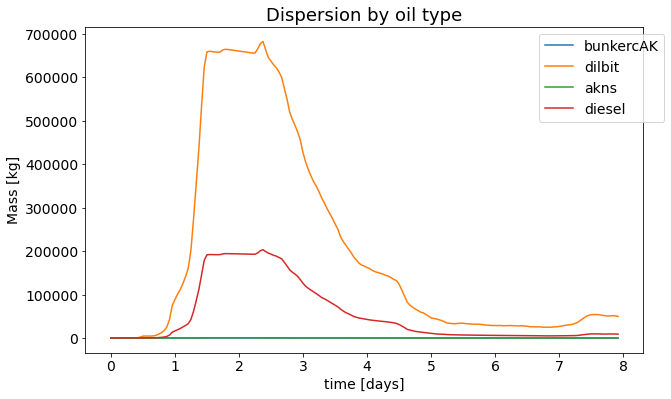

In [4]:
for oil in oil_types:
    ax = results[oil]['MDispersed'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title('Dispersion by oil type')
    ax.legend(bbox_to_anchor=(1.05, 1))

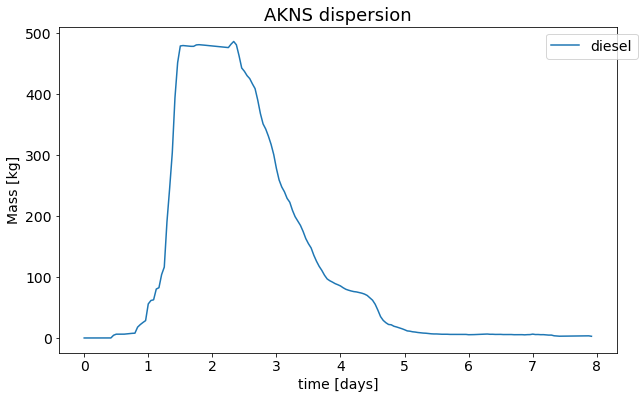

In [5]:
ax = results["akns"]['MDispersed'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title("AKNS dispersion")
ax.legend(bbox_to_anchor=(1.05, 1))

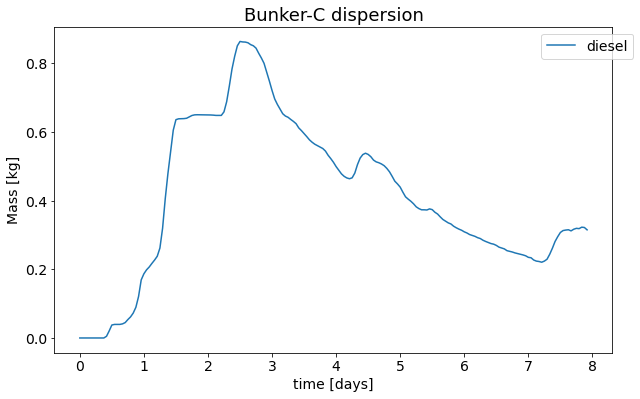

In [6]:
ax = results["bunkercAK"]['MDispersed'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title("Bunker-C dispersion")
ax.legend(bbox_to_anchor=(1.05, 1))

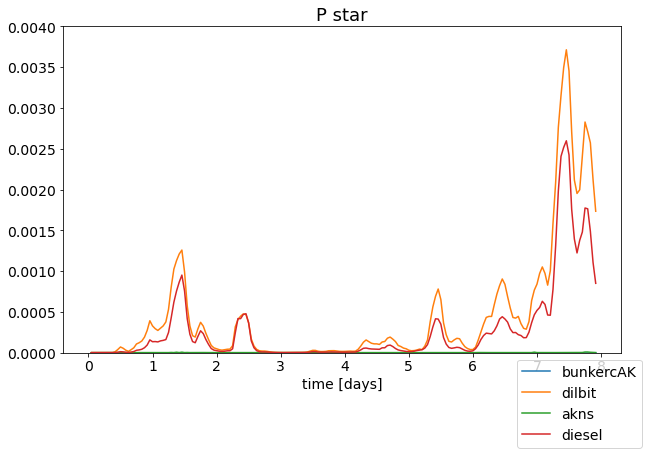

In [7]:
for oil in oil_types:
    ax = results[oil]['P_Star'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_xlabel('time [days]')
    ax.set_title('P star')
    ax.set_ylim(0,4e-3)
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

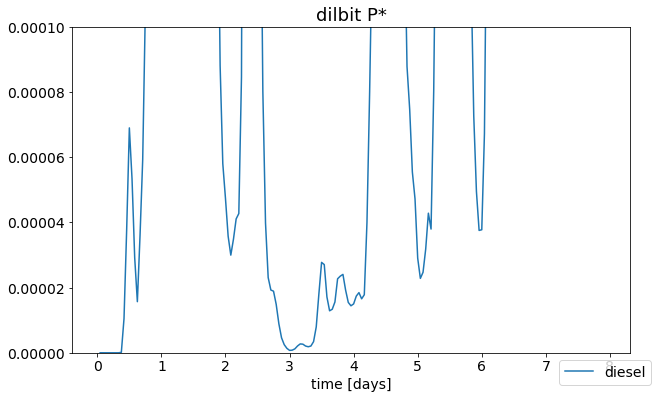

In [8]:
ax = results['dilbit']['P_Star'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_xlabel('time [days]')
ax.set_title('dilbit P*')
ax.set_ylim(0,1e-4)
ax.legend(bbox_to_anchor=(1.05, 1e-5))

### P* is a function of density, viscosity and thickness...checking which of these holds influence

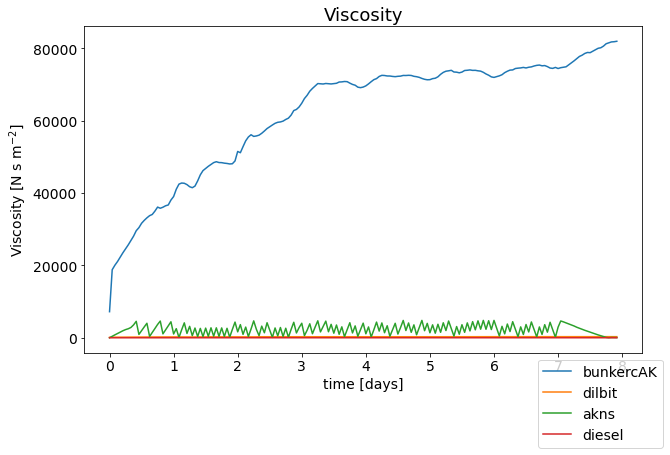

In [9]:
for oil in oil_types:
    ax = results[oil]['Viscosity'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel(r'Viscosity [N s m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Viscosity')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

Text(0.5, 1.0, 'diesel')

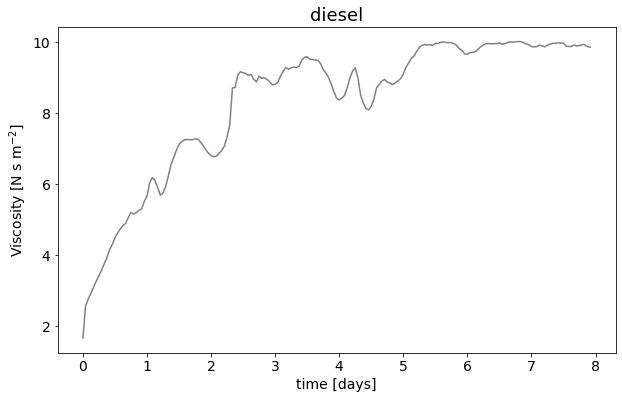

In [10]:
ax = results["diesel"]['Viscosity'].plot(
    linewidth=1.5,
    color = 'grey',
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Viscosity [N s m$^{-2}$]')
ax.set_xlabel('time [days]')
ax.set_title('diesel')

Text(0.5, 1.0, 'dilbit')

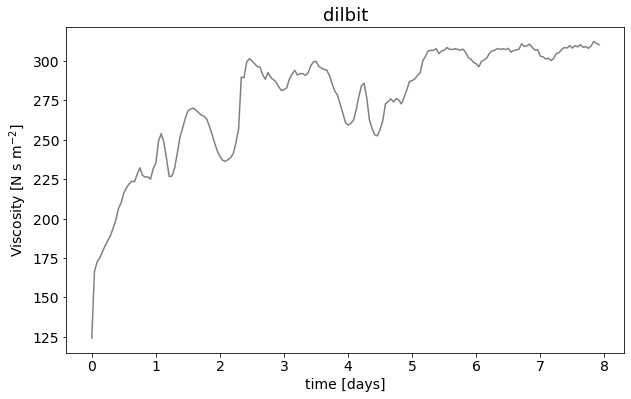

In [11]:
ax = results["dilbit"]['Viscosity'].plot(
    linewidth=1.5,
    color = 'grey',
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Viscosity [N s m$^{-2}$]')
ax.set_xlabel('time [days]')
ax.set_title('dilbit')

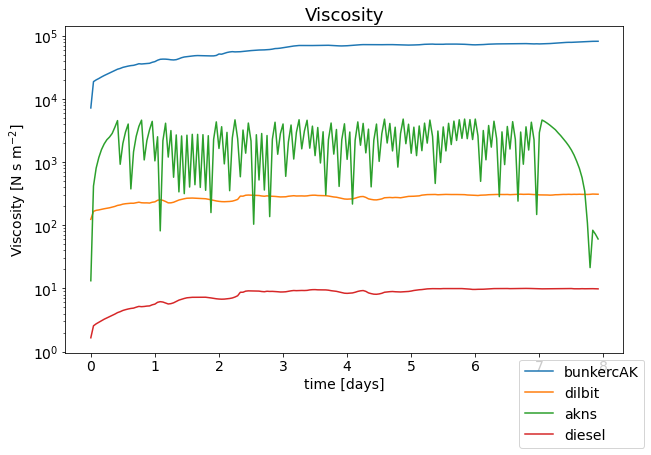

In [12]:
for oil in oil_types:
    ax = results[oil]['Viscosity'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Viscosity [N s m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Viscosity')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

#### I'm concerned about this AKNS viscosity

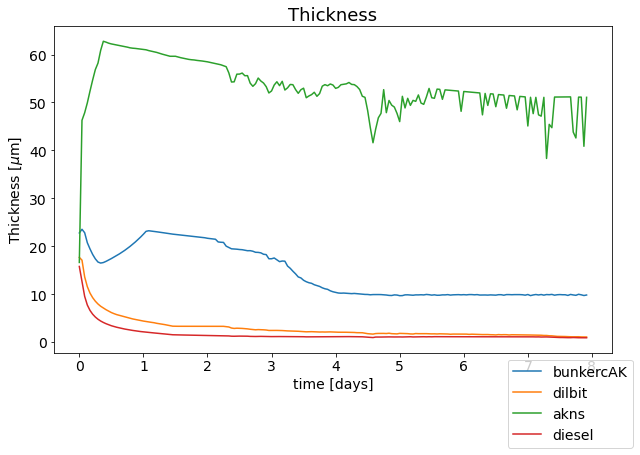

In [13]:
for oil in oil_types:
    ax = results[oil]['Thickness'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel(r'Thickness [$\mu$m]')
    ax.set_xlabel('time [days]')
    ax.set_title('Thickness')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

### Both AKNS and Bunker-C are really thick, which I think accounts for the lack of dispersion

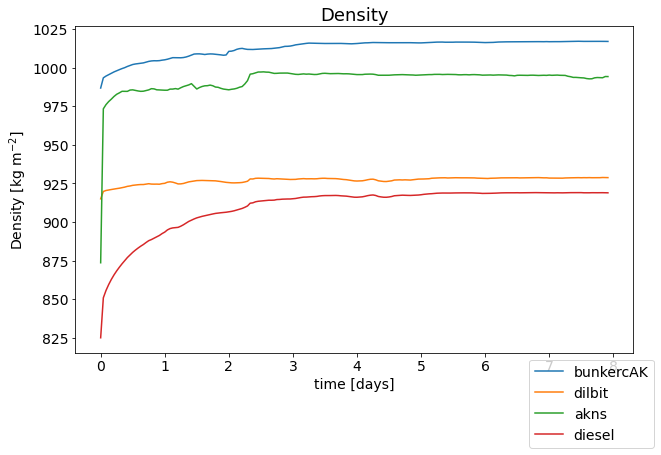

In [14]:
for oil in oil_types:
    ax = results[oil]['Density'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Density [kg m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Density')
    #ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

### Plot all variables in .sro for an overview

In [15]:
results[oil].keys()

Index(['seconds_since_spill', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MFloating',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5', 'datetime',
       'MBeached', 'MTotal', 'MInitial'],
      dtype='object')

In [16]:
plot_values = ['MFloating',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5','MBeached', 'MTotal', 'MInitial']

In [17]:
color_dict = {"bunkercAK": "darkblue",
              "dilbit": "royalblue", 
              "akns": "skyblue", 
              "diesel": "darkolivegreen"}

<ipython-input-18-45185b663c00>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


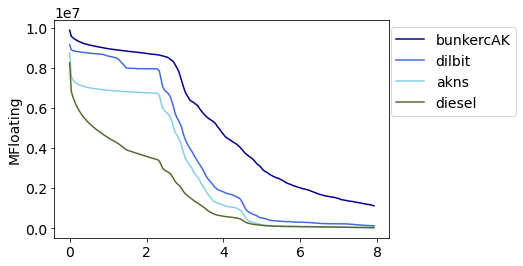

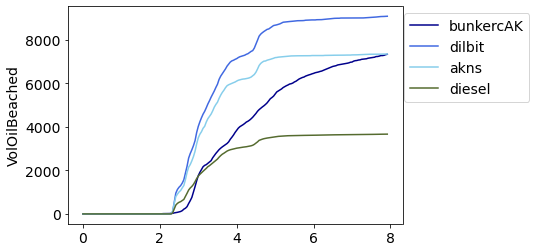

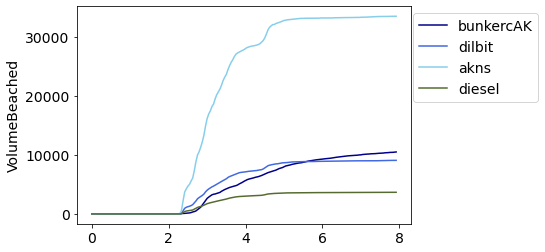

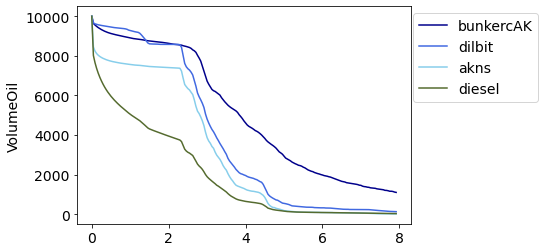

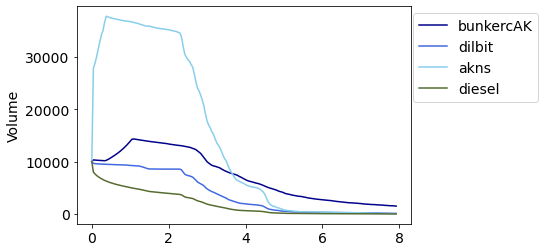

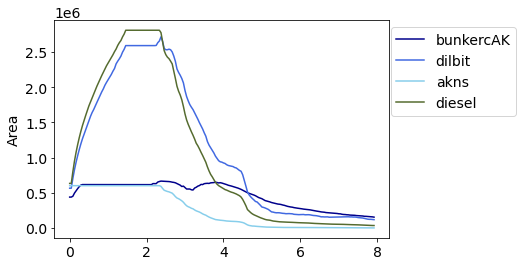

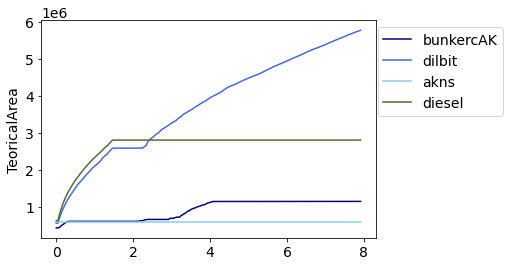

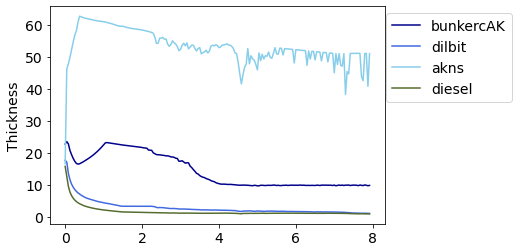

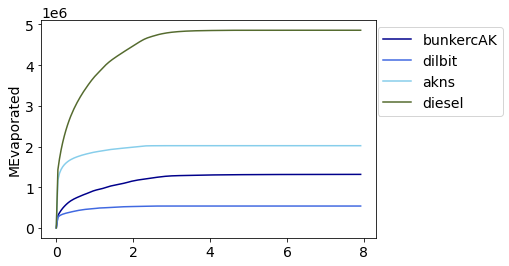

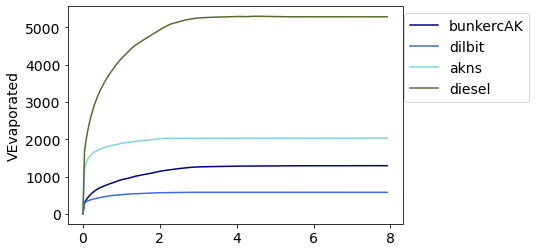

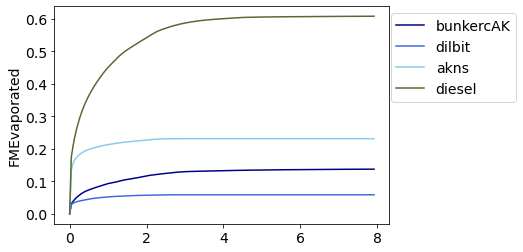

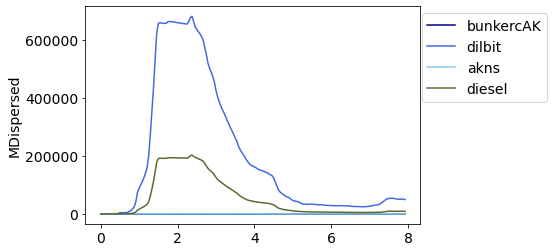

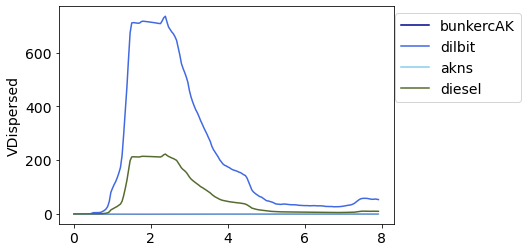

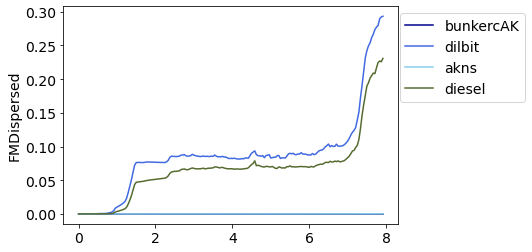

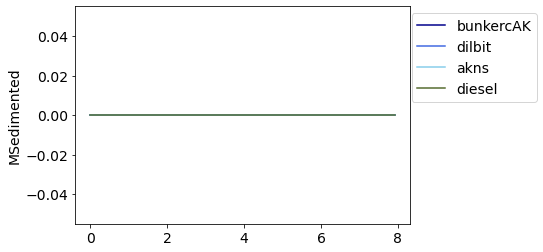

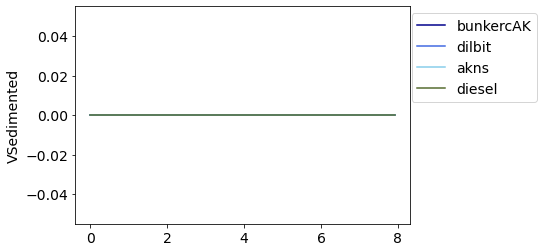

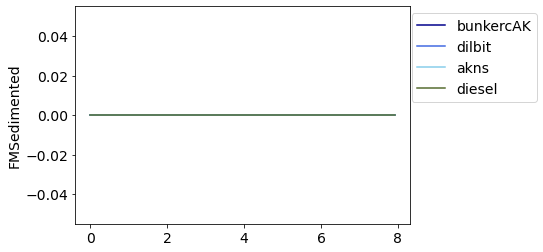

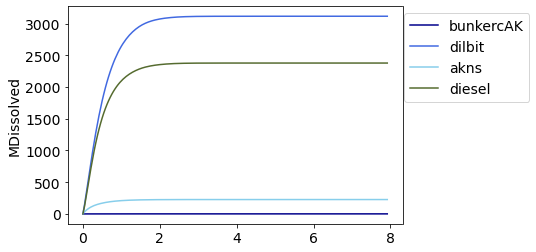

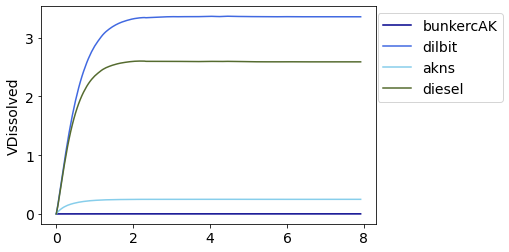

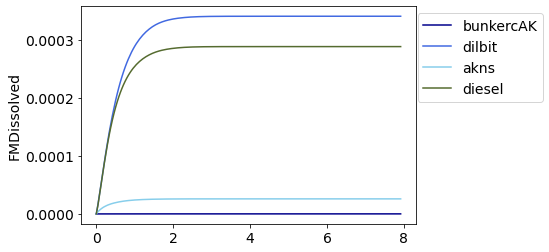

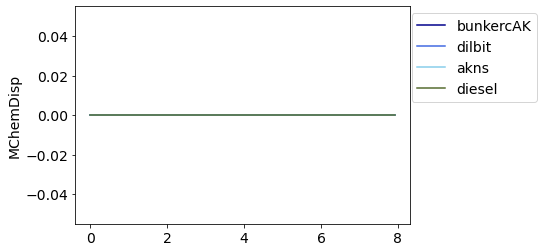

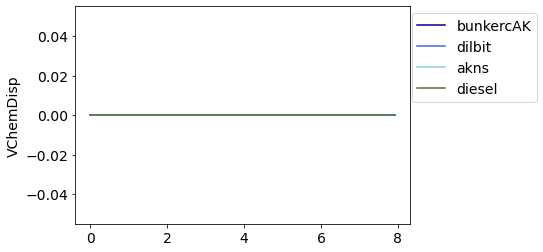

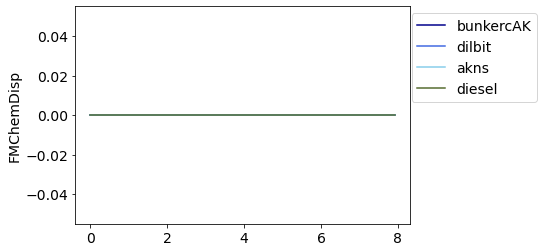

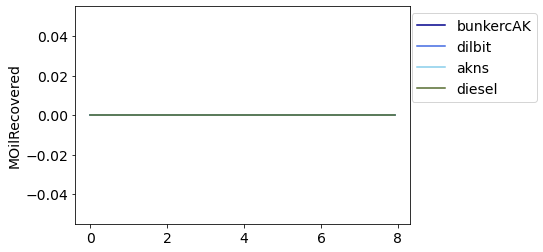

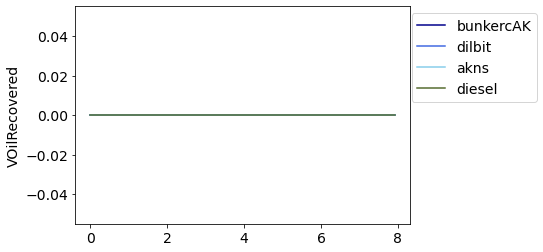

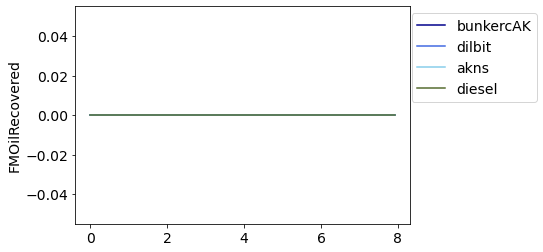

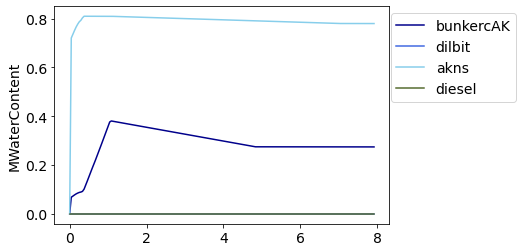

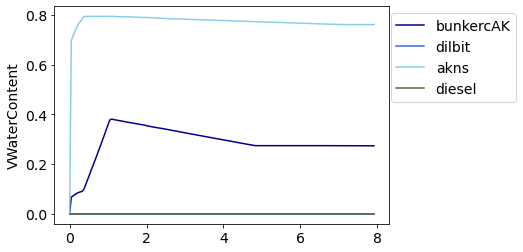

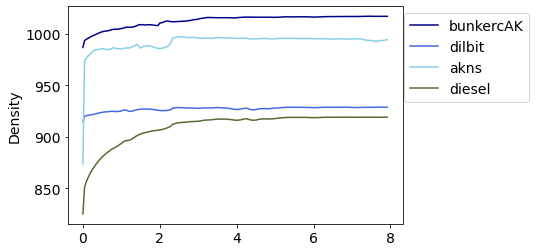

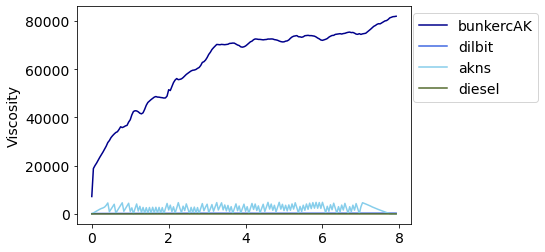

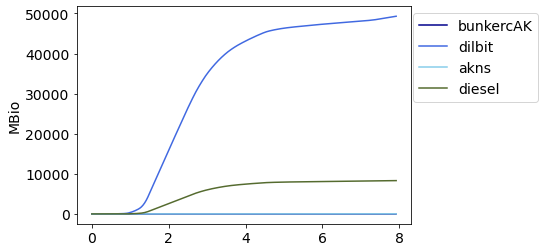

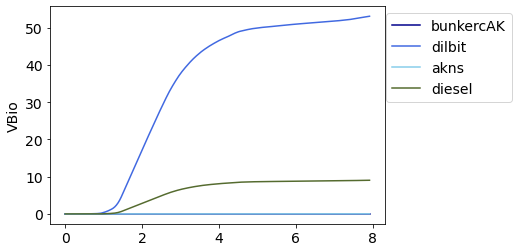

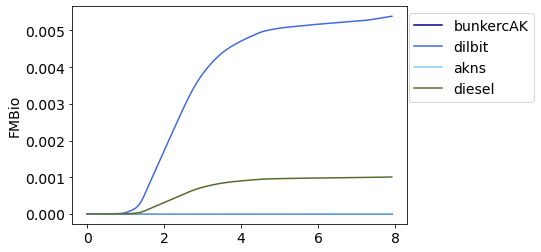

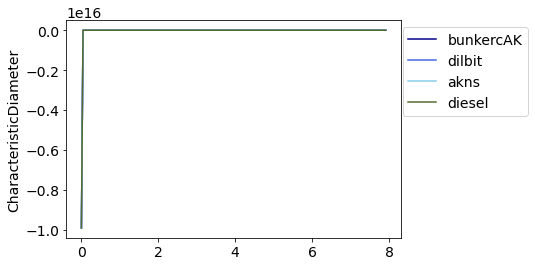

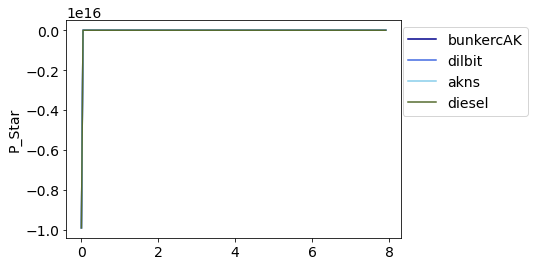

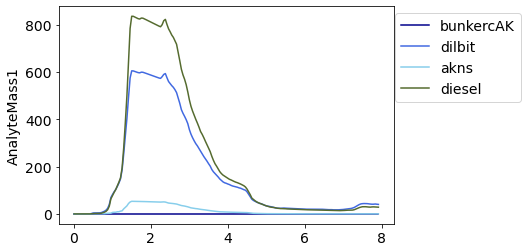

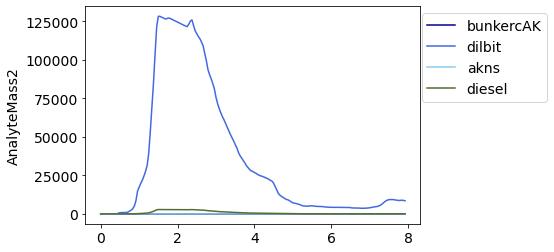

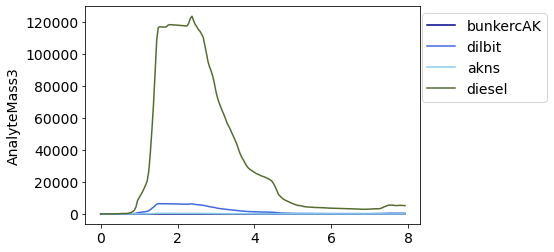

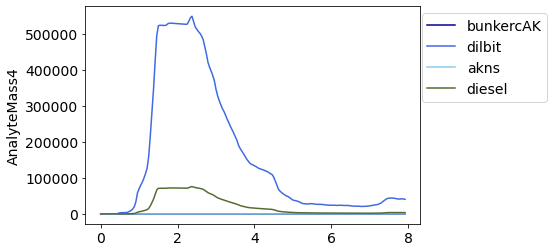

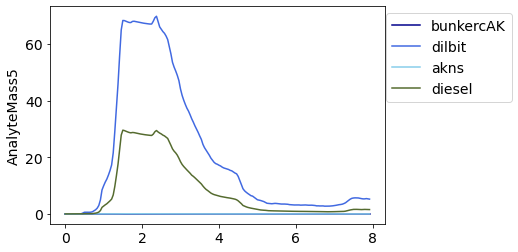

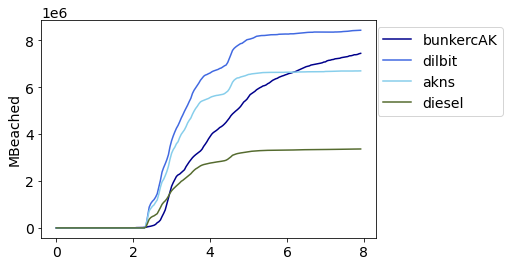

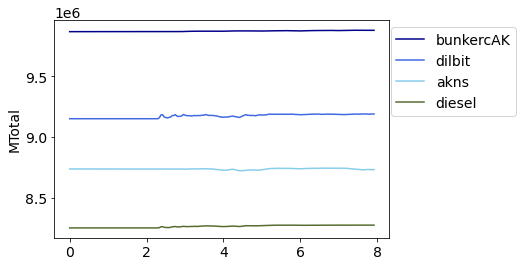

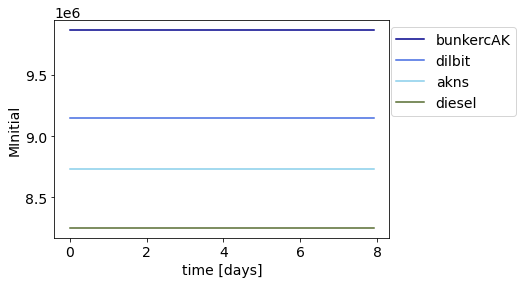

In [18]:
for value in plot_values:
    fig, ax = plt.subplots()
    for oil in oil_types:
        ax.plot(results[oil][value],
               label = oil,
               linewidth=1.5,
               color = color_dict.get(oil,'#333333'))

    ax.set_ylabel(value)
    if value in plot_values[-1]:
        ax.set_xlabel('time [days]')
    #ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.4, 1))


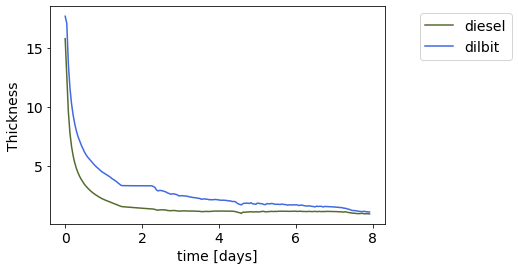

In [19]:
fig, ax = plt.subplots()
for oil in ['diesel','dilbit']:
    ax.plot(results[oil]['Thickness'],
           label = oil,
           linewidth=1.5,
           color = color_dict.get(oil,'#333333'))

ax.set_ylabel(value)
if value in plot_values[-1]:
    ax.set_xlabel('time [days]')
#ax.set_yscale('log')
ax.set_ylabel('Thickness')
ax.legend(bbox_to_anchor=(1.4, 1))

## These thickness values are well above the ThicknessLimit, up to the very end. 

## Next: Evaluate the following three cases. 
- AKNS with Mackay emulsification
- AKNS with larger CEMULS value (exagerating to 1.5e-5 to see if we can see a difference)
- Dilbit with CEMULS corrected to 1.5e-6

In [23]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/debug/')

# This date includes 2 bunker-c cases
oil_types = ["akns_cemuls1p5em5", "akns_mackayemuls"]

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'{oil}.sro'
    results[oil] = load_sro(fname[oil])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


## Start with comparing the AKNS cases

<ipython-input-26-7da56c7eb89e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


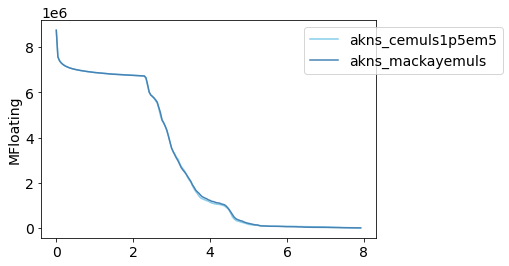

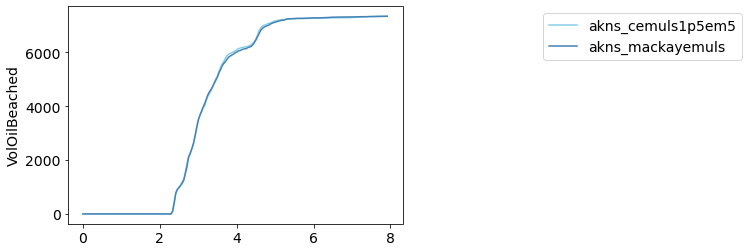

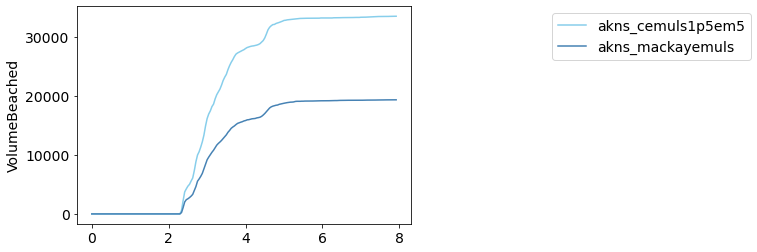

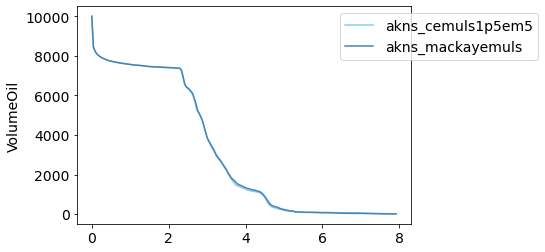

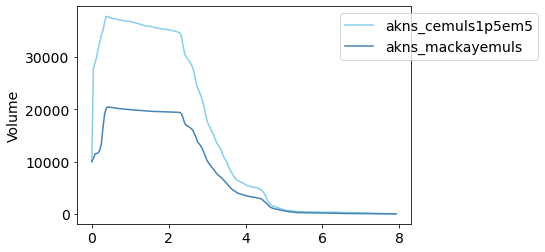

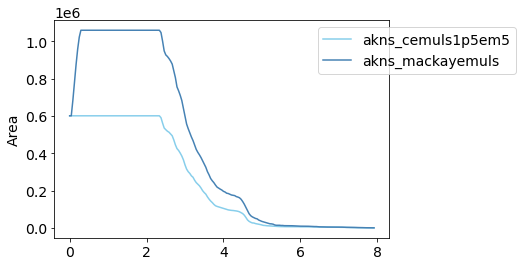

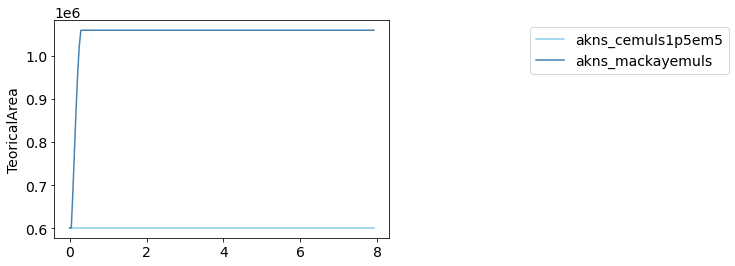

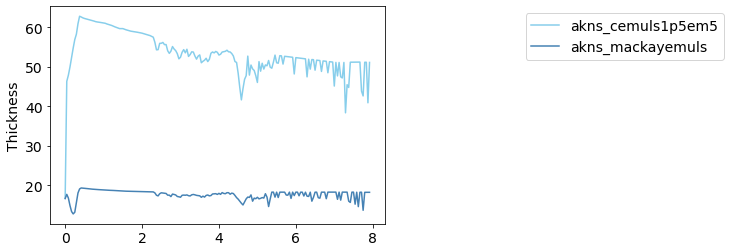

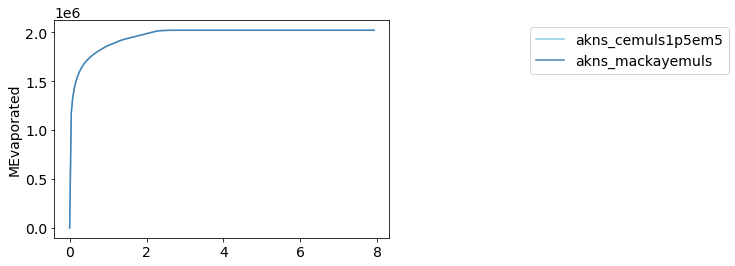

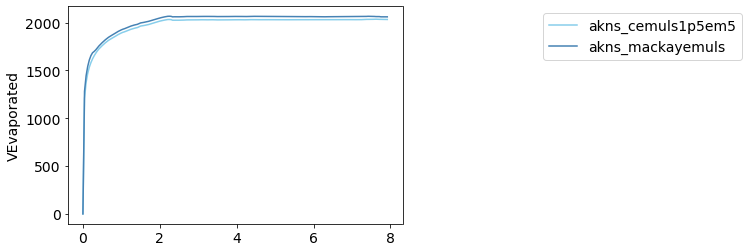

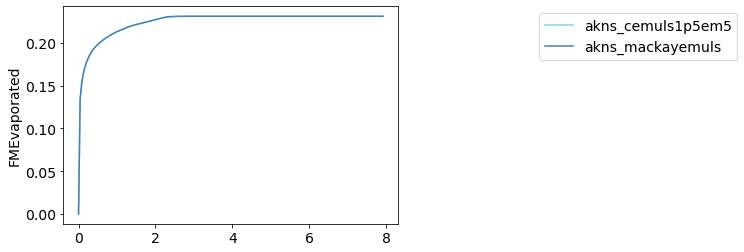

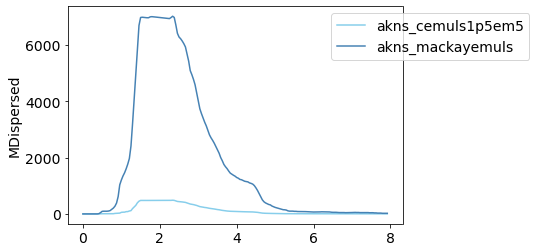

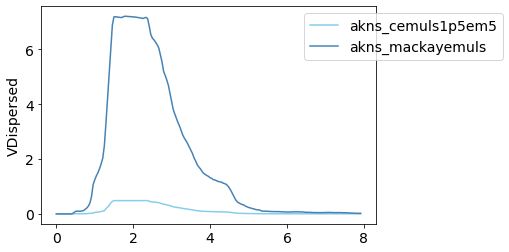

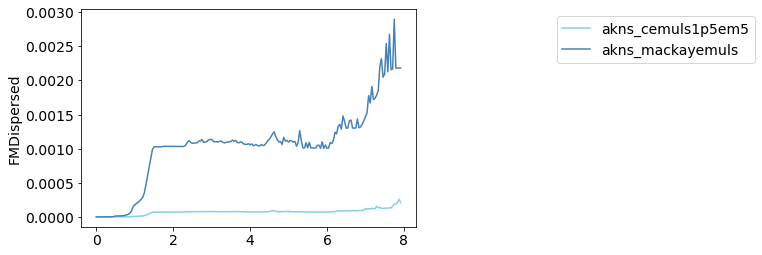

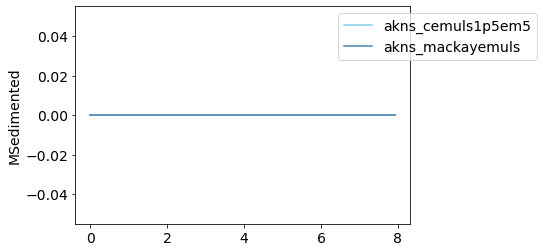

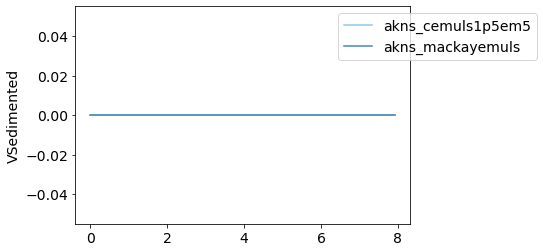

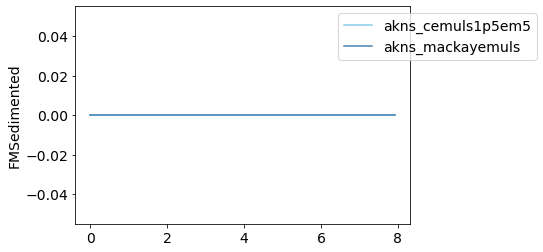

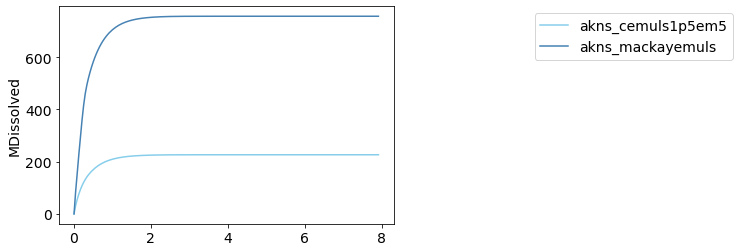

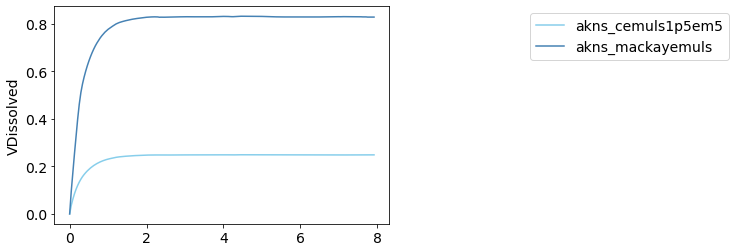

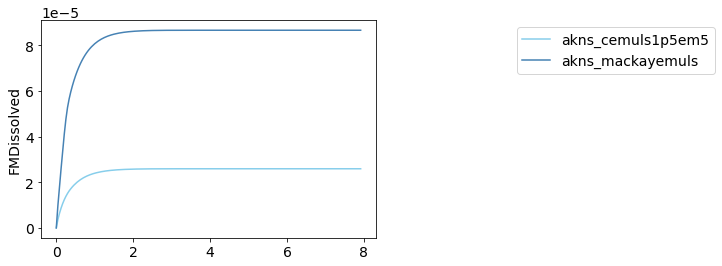

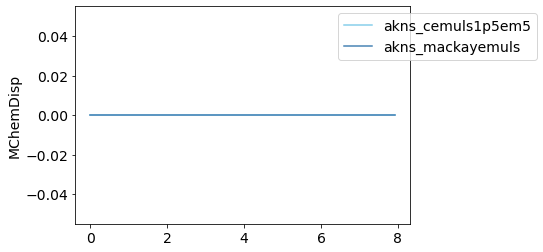

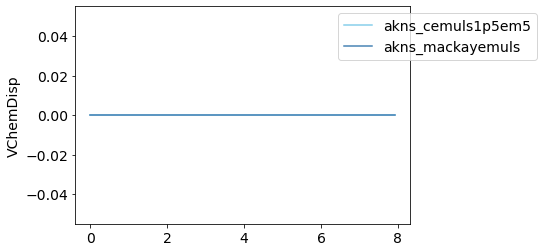

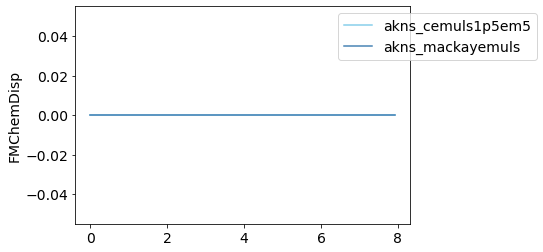

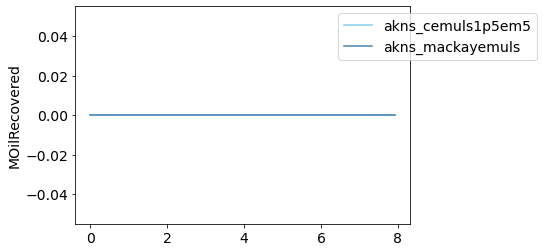

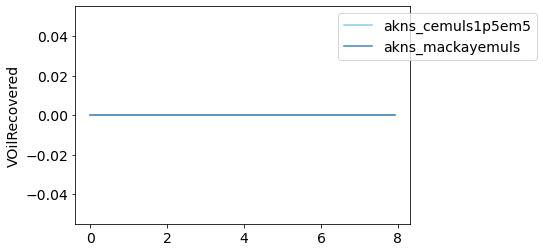

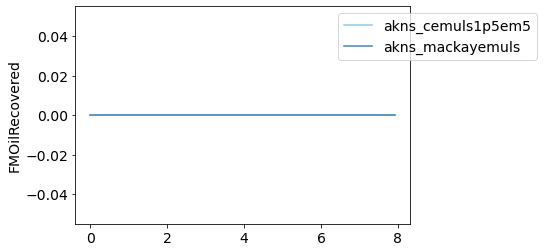

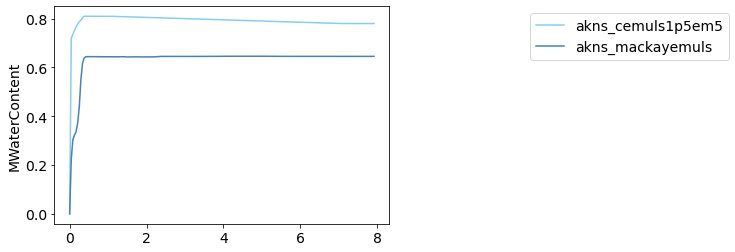

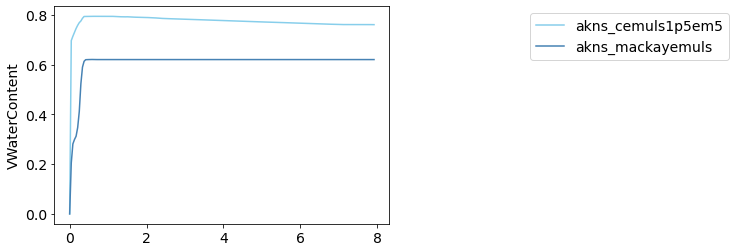

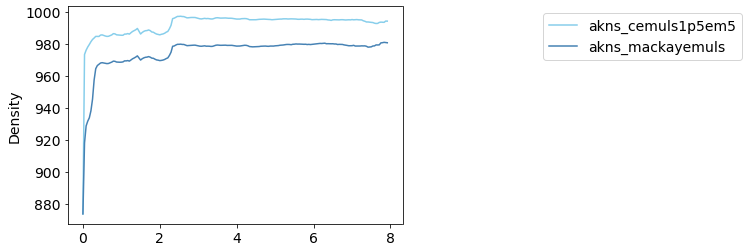

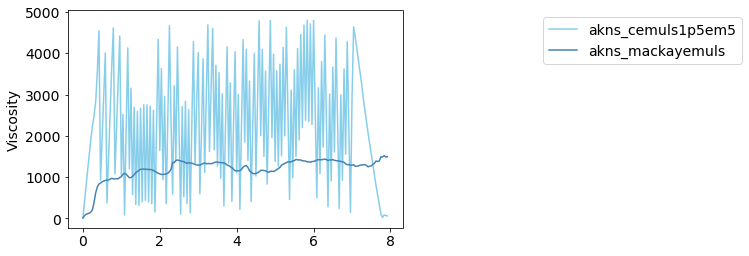

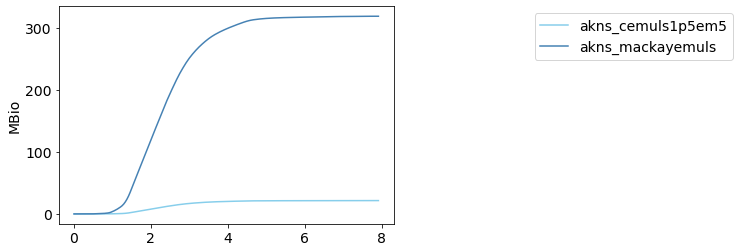

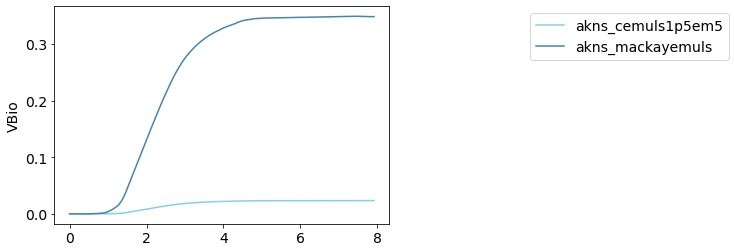

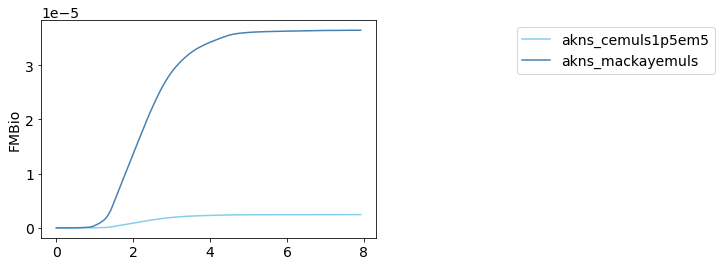

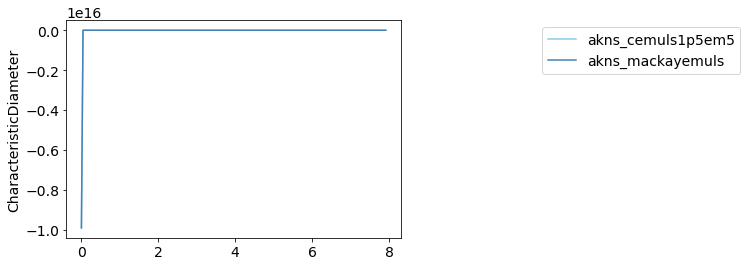

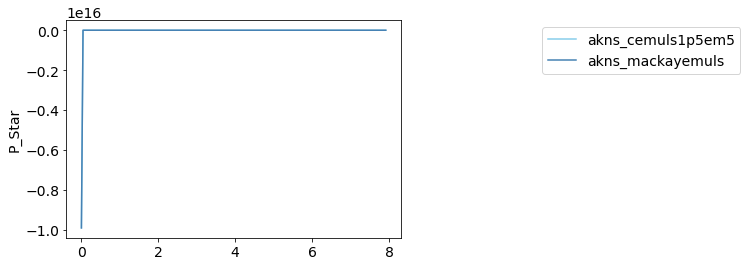

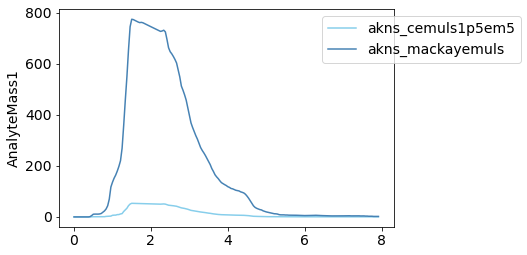

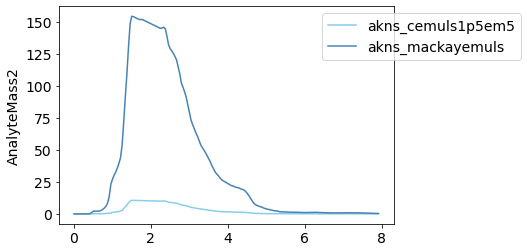

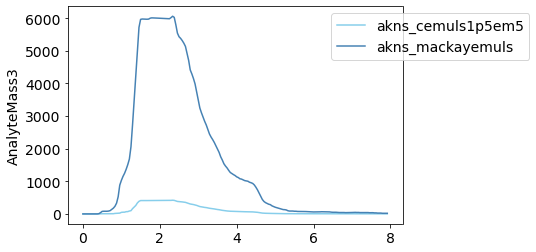

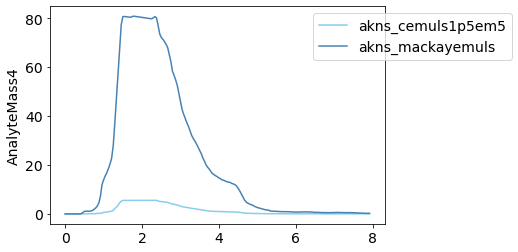

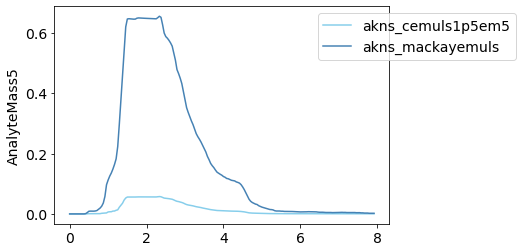

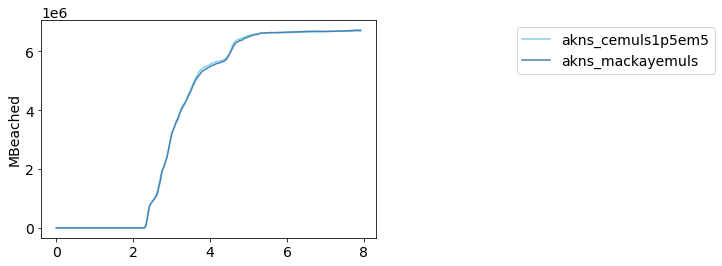

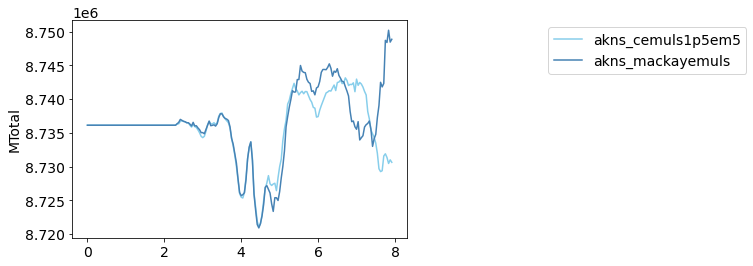

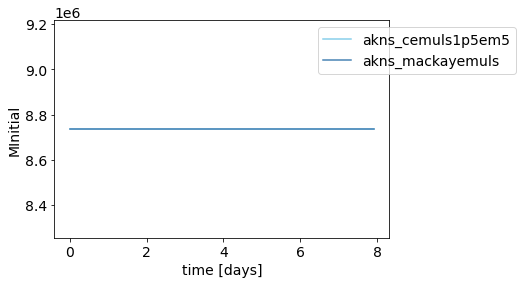

In [26]:
color_dict = {"akns_cemuls1p5em5": "skyblue", 
              "akns_mackayemuls": "steelblue"}

for value in plot_values:
    fig, ax = plt.subplots()
    for oil in oil_types:
        ax.plot(results[oil][value],
               label = oil,
               linewidth=1.5,
               color = color_dict.get(oil,'#333333'))

    ax.set_ylabel(value)
    if value in plot_values[-1]:
        ax.set_xlabel('time [days]')
    #ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.4, 1))



### Take aways: 
- The jagged viscosity is an artifact of Fingas emulsification.  
- Fingas emulsification doesn't incorporate max water content information; Mackay does.  

## Now compare the original dilbit results (CEMULS = 8) with those using CEMULS = 1.5e-6

In [34]:
fname = {}
fname['dilbit_CEMULS8'] = '/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/resOilOutput_dilbit.sro'
fname['dilbit_CEMULS1p5em6'] = '/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/debug/dilbit_CEMULS.sro'

oil_types = ['dilbit_CEMULS8', 'dilbit_CEMULS1p5em6']

results = {}
for oil in oil_types:
    results[oil] = load_sro(fname[oil])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


In [36]:
color_dict = {"dilbit_CEMULS8": "royalblue", 
              "dilbit_CEMULS1p5em6": "cornflowerblue"}

<ipython-input-37-edf442577d89>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


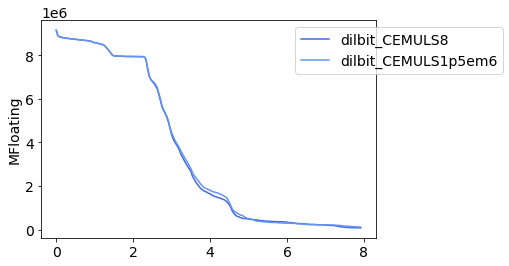

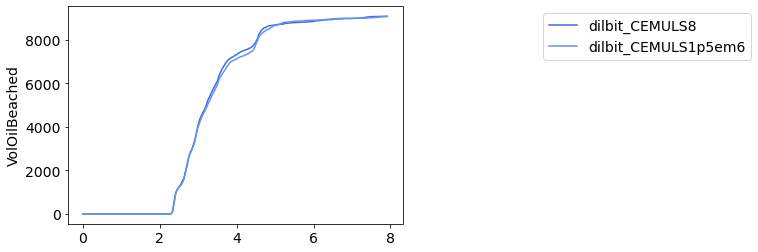

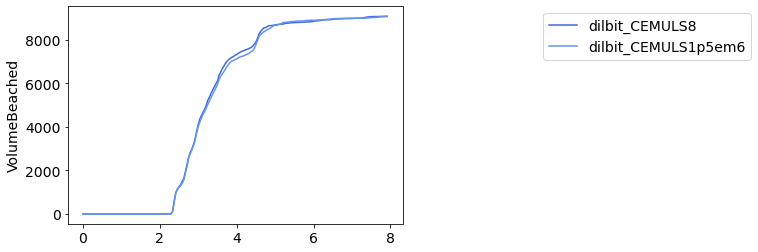

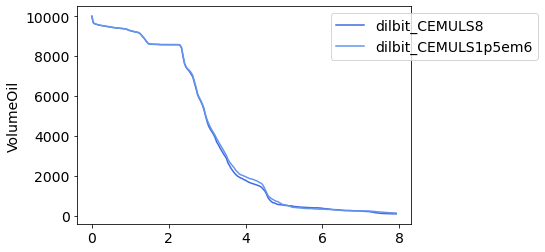

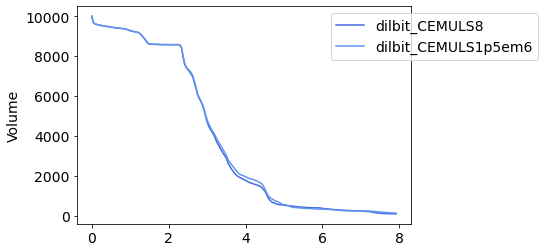

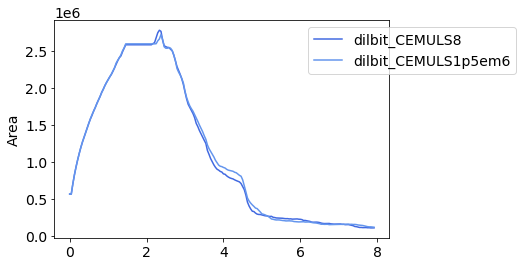

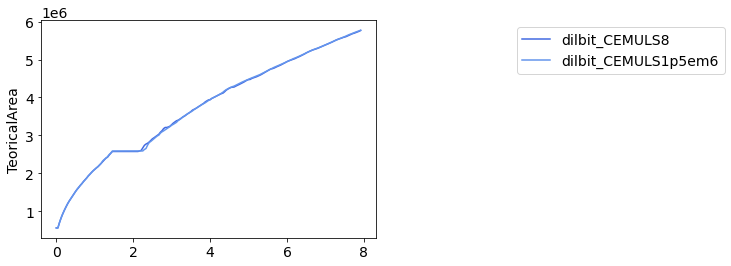

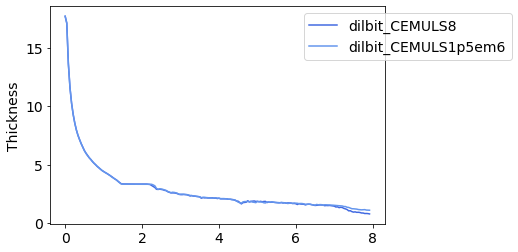

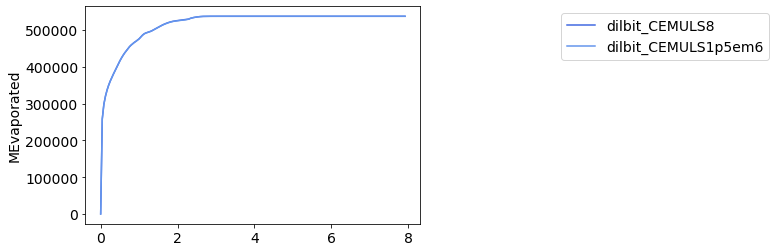

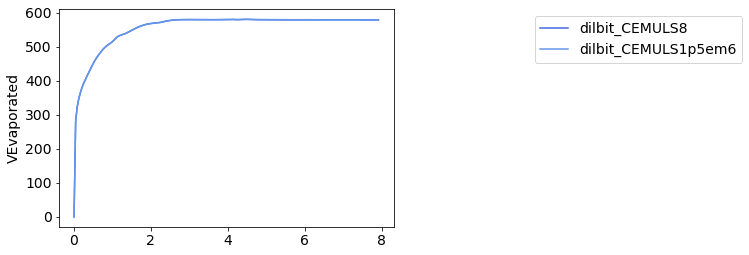

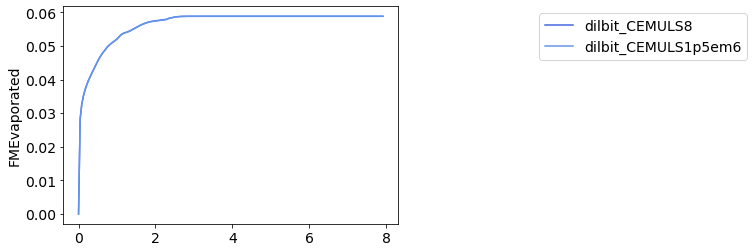

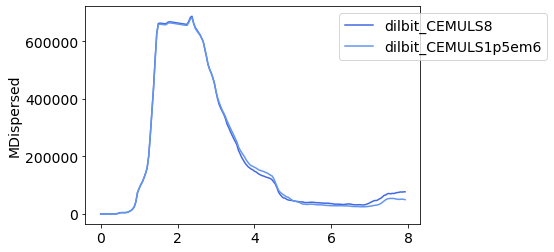

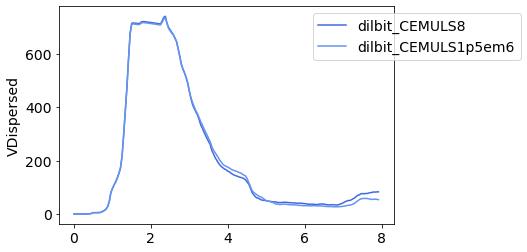

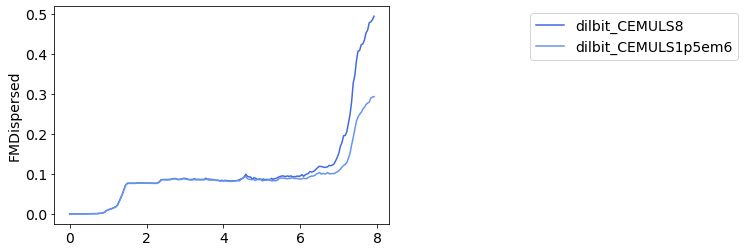

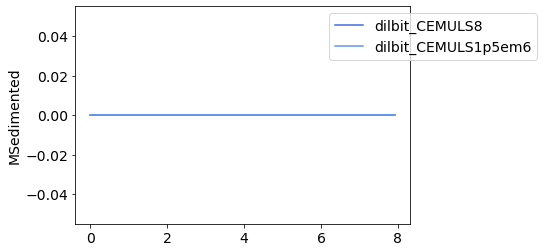

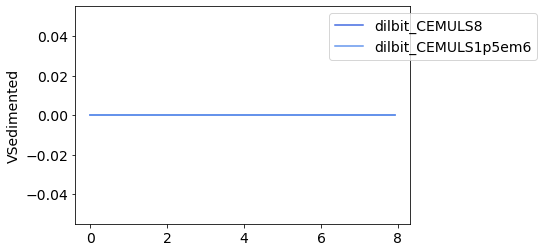

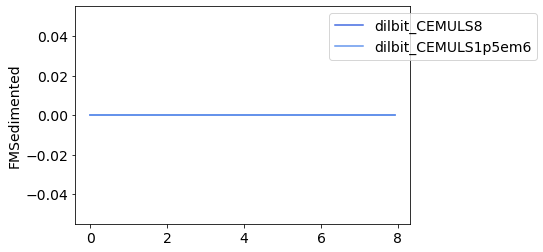

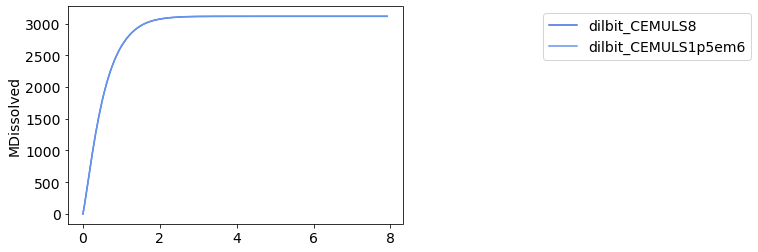

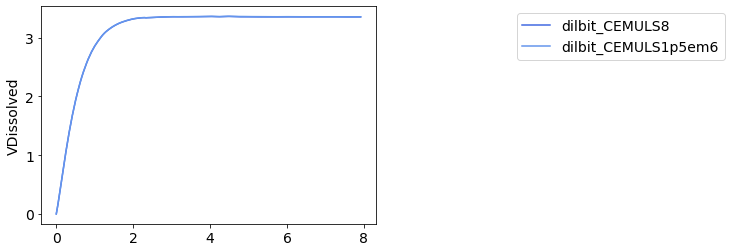

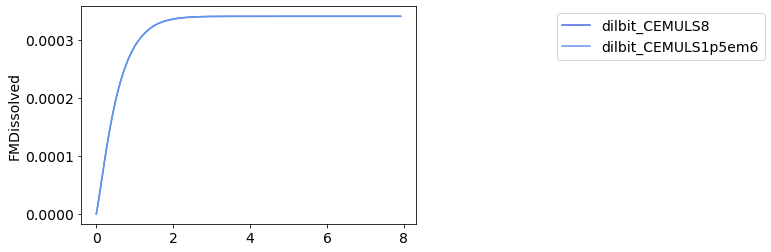

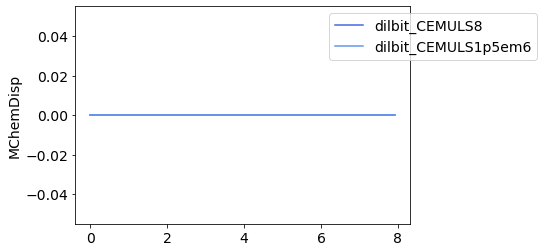

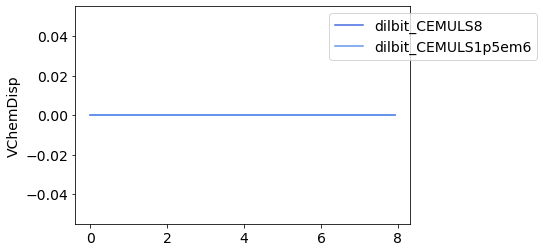

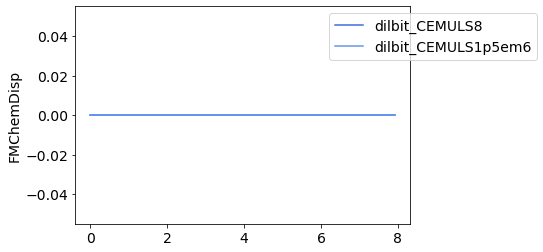

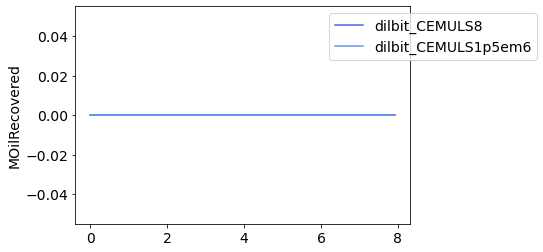

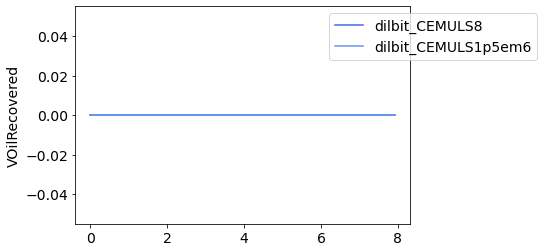

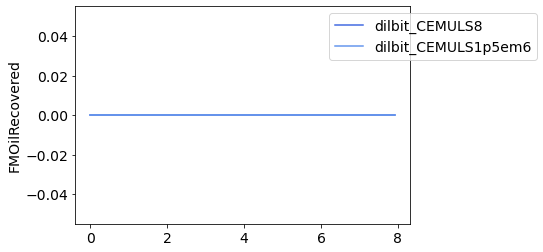

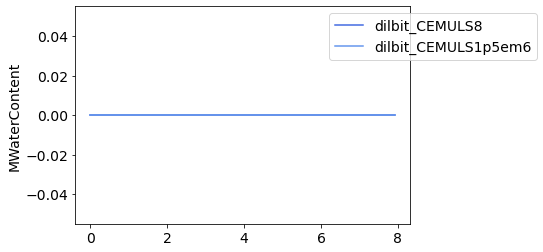

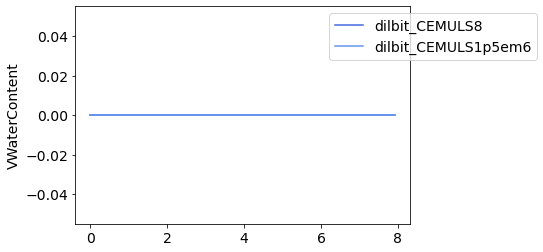

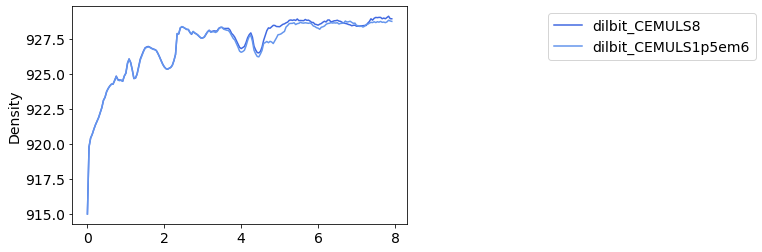

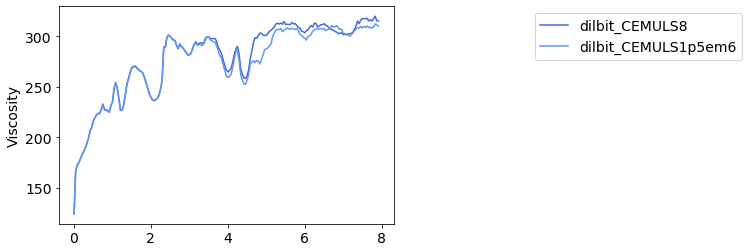

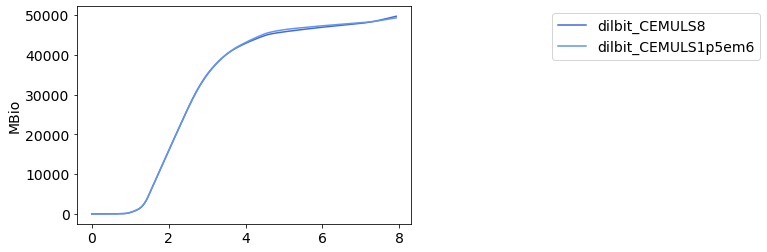

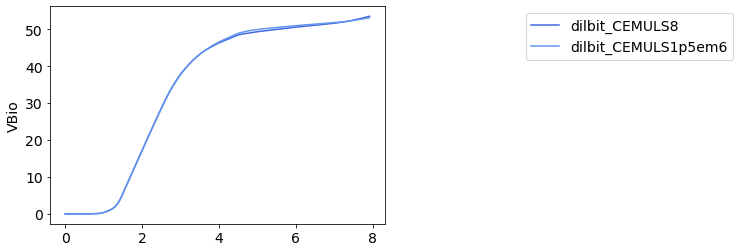

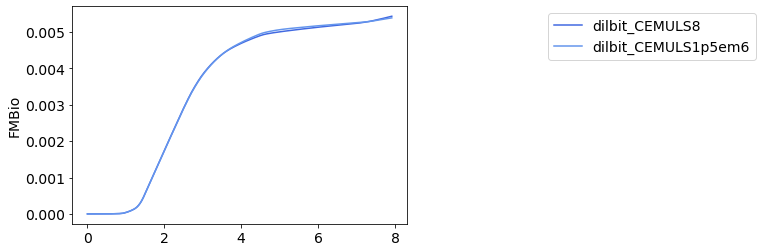

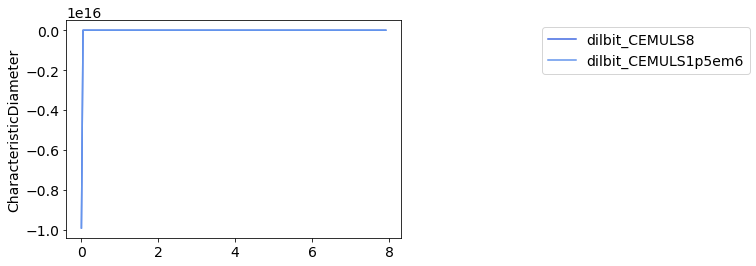

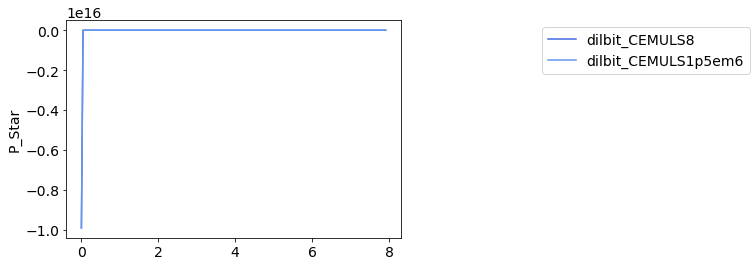

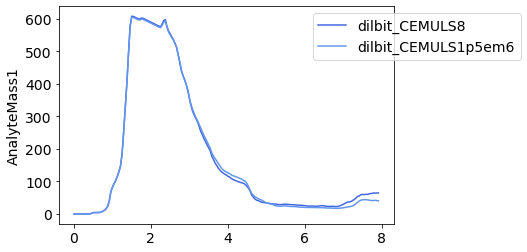

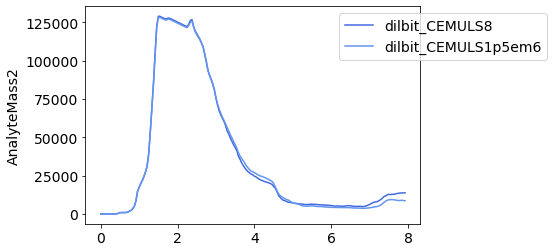

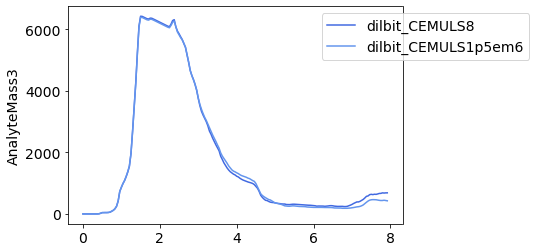

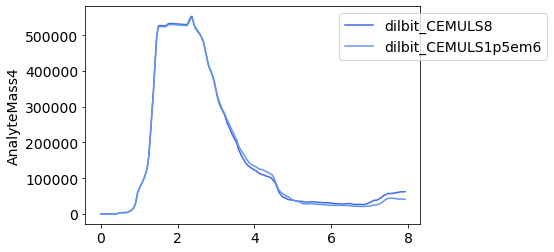

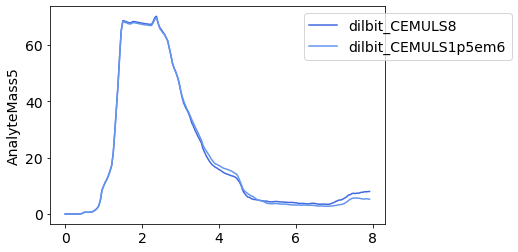

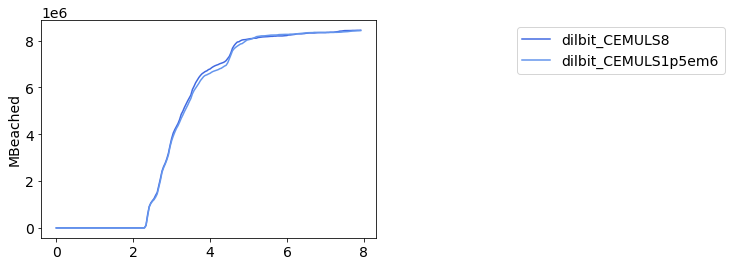

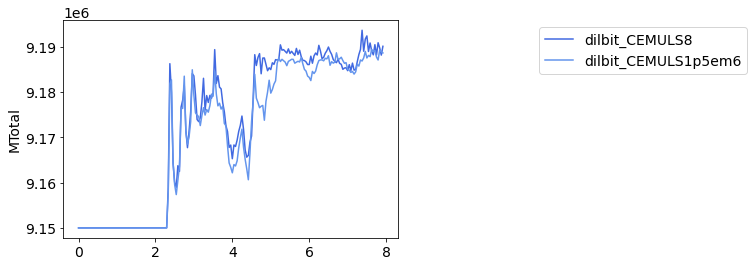

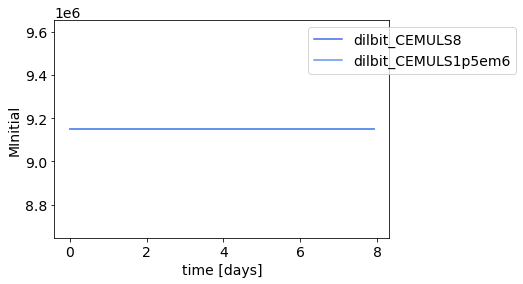

In [37]:
for value in plot_values:
    fig, ax = plt.subplots()
    for oil in oil_types:
        ax.plot(results[oil][value],
               label = oil,
               linewidth=1.5,
               color = color_dict.get(oil,'#333333'))

    ax.set_ylabel(value)
    if value in plot_values[-1]:
        ax.set_xlabel('time [days]')
    #ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.4, 1))




### Take-away: Impressively unimpressive differences between results with CEMUL values that are O(1e6) different!